<h1><center>Multiple Linear Regression</center></h1>

<h4>About this Notebook</h4>
In this notebook, we learn how to use scikit-learn to implement Multiple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


In [21]:
#Importing Needed packages

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


#Reading data

df1 = pd.read_csv(r"C:\Users\User\Downloads\FuelConsumptionCo2.csv", encoding='ascii')
df1.head(5)



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUELTYPE** e.g. z
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [22]:
#Lets first have a descriptive exploration on our data.
# summarize the data
df1.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [23]:
#Lets select some features to explore more.

cdf = df1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


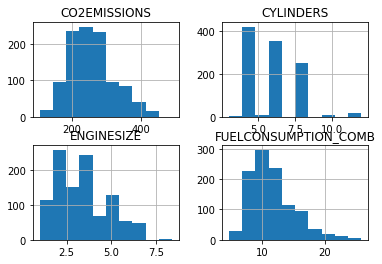

In [24]:
#we can plot each of these features:

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()


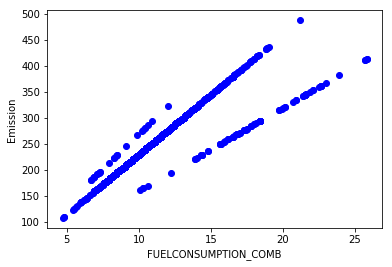

In [25]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

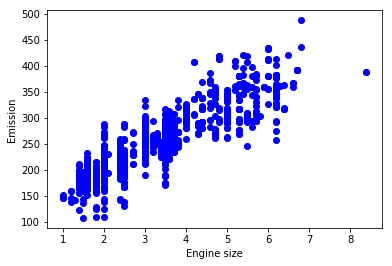

In [26]:
### Now, lets plot each of these features vs the Emission, to see how linear is their relation

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


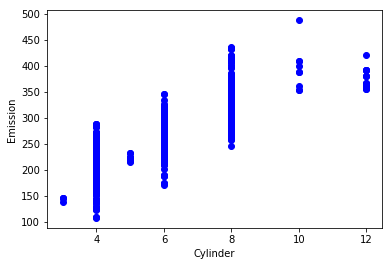

In [27]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

# Multiple Regression Model
In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [29]:
msk = np.random.rand(len(df1)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.71262636  7.4916941   9.75923335]]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.


#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

In [32]:
# Prediction


x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat= regr.predict(x)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 612.47
Variance score: 0.84


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

In [11]:
#Lets select some features to explore more.

cdf2 = df1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


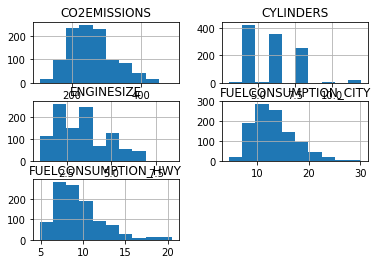

In [12]:

cdf2.hist()
plt.show()


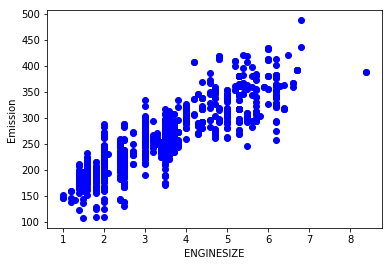

In [13]:
plt.scatter(cdf2.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

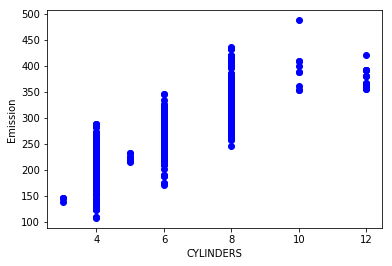

In [14]:
plt.scatter(cdf2.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

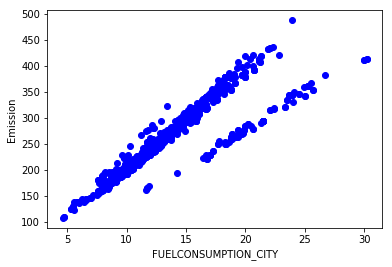

In [15]:
plt.scatter(cdf2.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

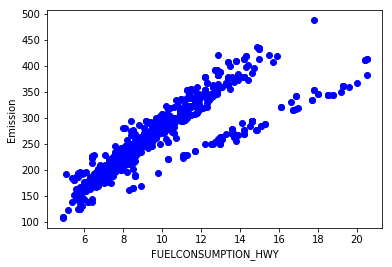

In [16]:
plt.scatter(cdf2.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")
plt.show()

In [17]:
msk = np.random.rand(len(df1)) < 0.8
train = cdf2[msk]
test = cdf2[~msk]

In [18]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.40233391  7.32500678  5.67417355  3.37863663]]


In [19]:

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_= regr.predict(x)
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 679.19
Variance score: 0.84
